In [1]:
#Predicting old car price using existing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading data from CSV
df = pd.read_csv(r"D:\Machine Learning\Project\UsedCarData\car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
#There are three catageory features Fuel_type,seller_type,Transmission
#Create dummies using one hot encoding for catageries variables
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())
print(df['Fuel_Type'].value_counts())

#Observations
#There are more Manual cars when compared to Automatic cars
#There are more Petrol cars when compared to Diesel Cars

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [12]:
#Check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
from datetime import date
todays_date = date.today()
print("Current year:", todays_date.year)
df['Used_Years'] = todays_date.year - df['Year']

Current year: 2021


In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Used_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [18]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Used_Years'],
      dtype='object')

In [20]:
df_new = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Used_Years']]

In [22]:
df_new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Used_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [24]:
df_new.drop(['Year'],axis = 1,inplace = True)

C:\Users\pavan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Used_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [27]:
df_new=pd.get_dummies(df_new,drop_first=True)

In [29]:
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Used_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [30]:
df_new.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Used_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Used_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


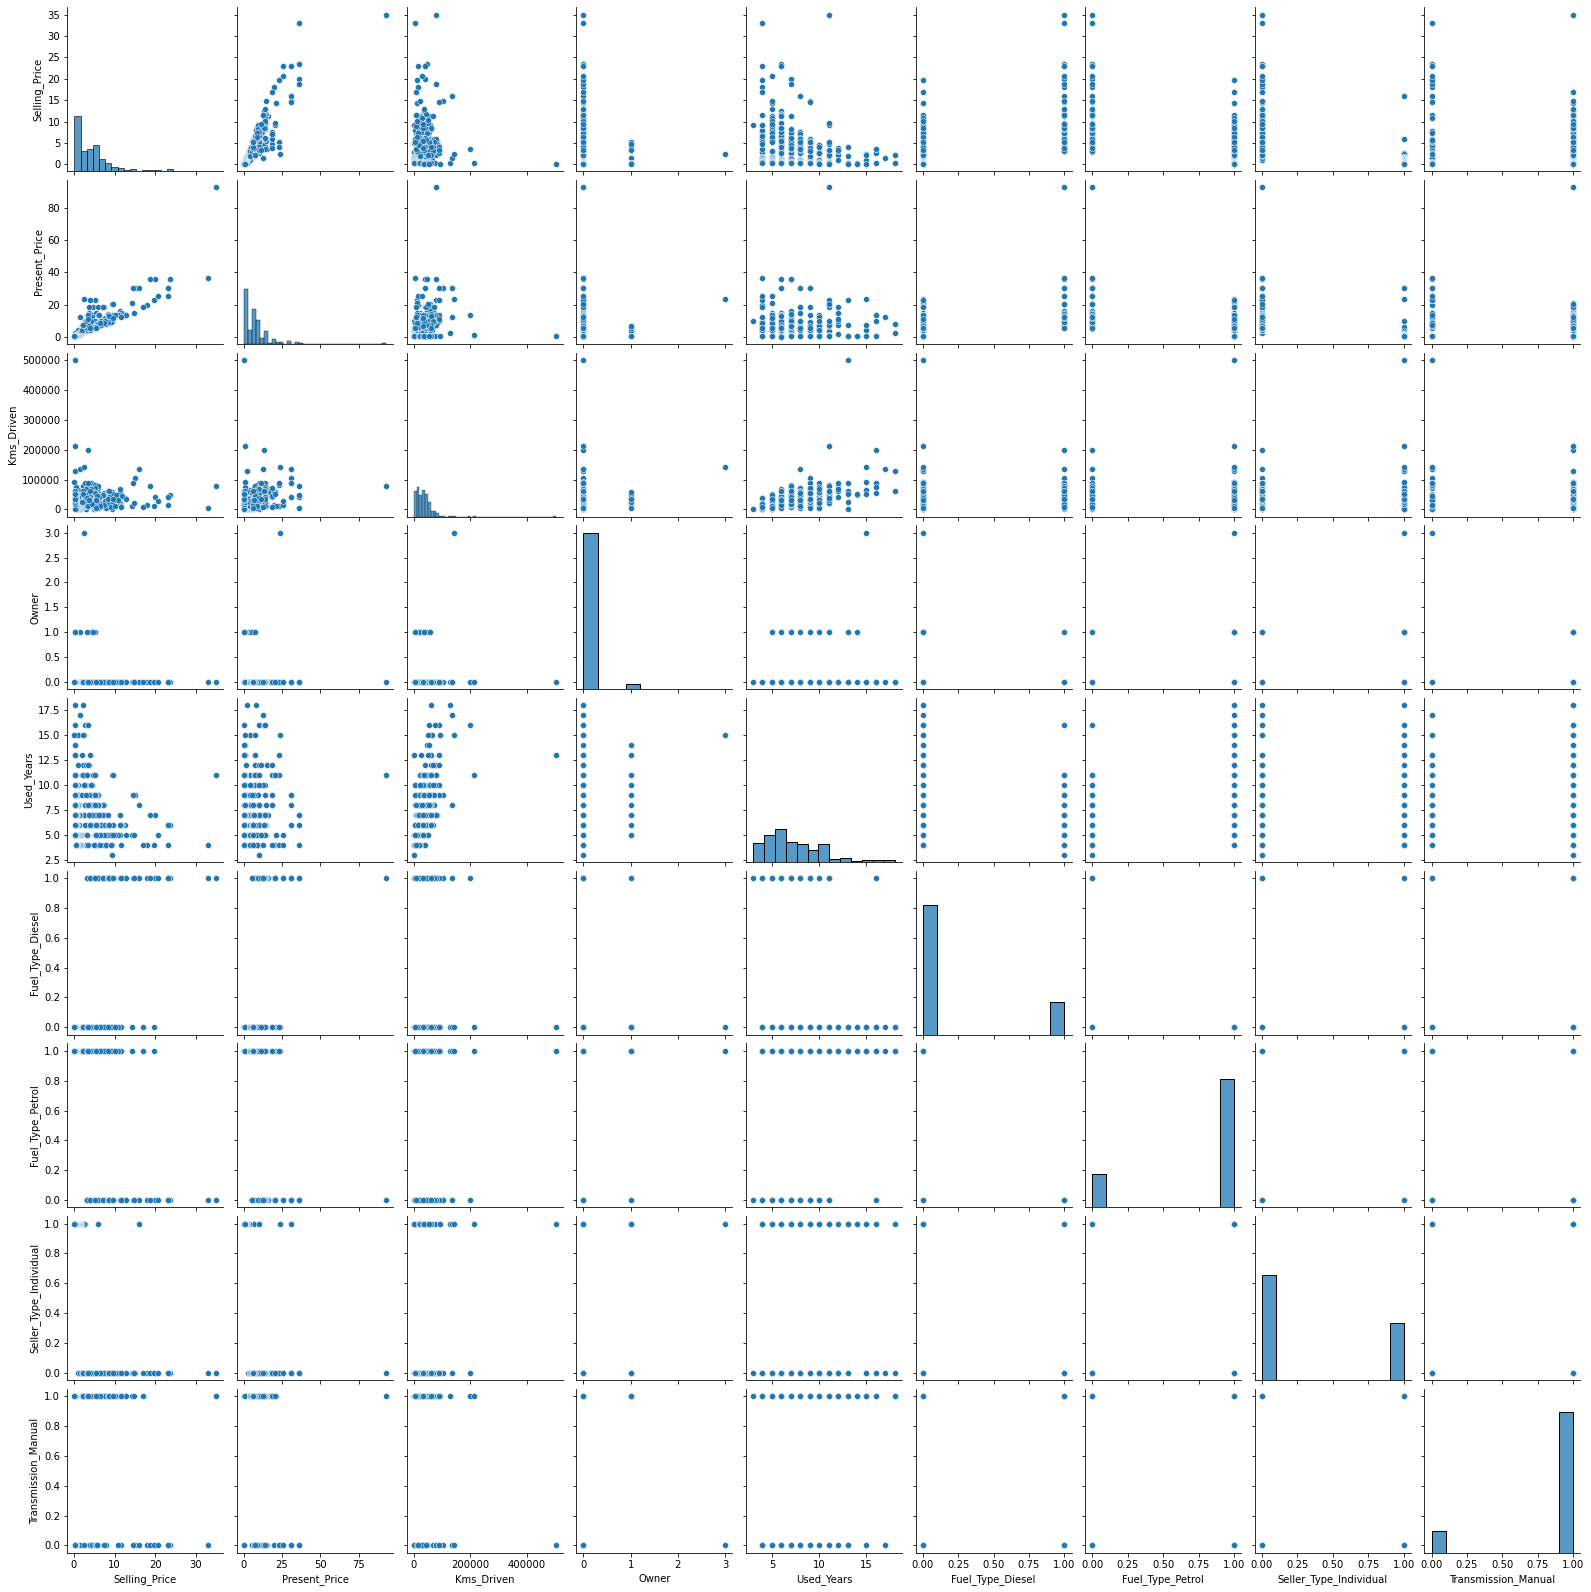

In [31]:
import seaborn as sns
sns.pairplot(df_new)

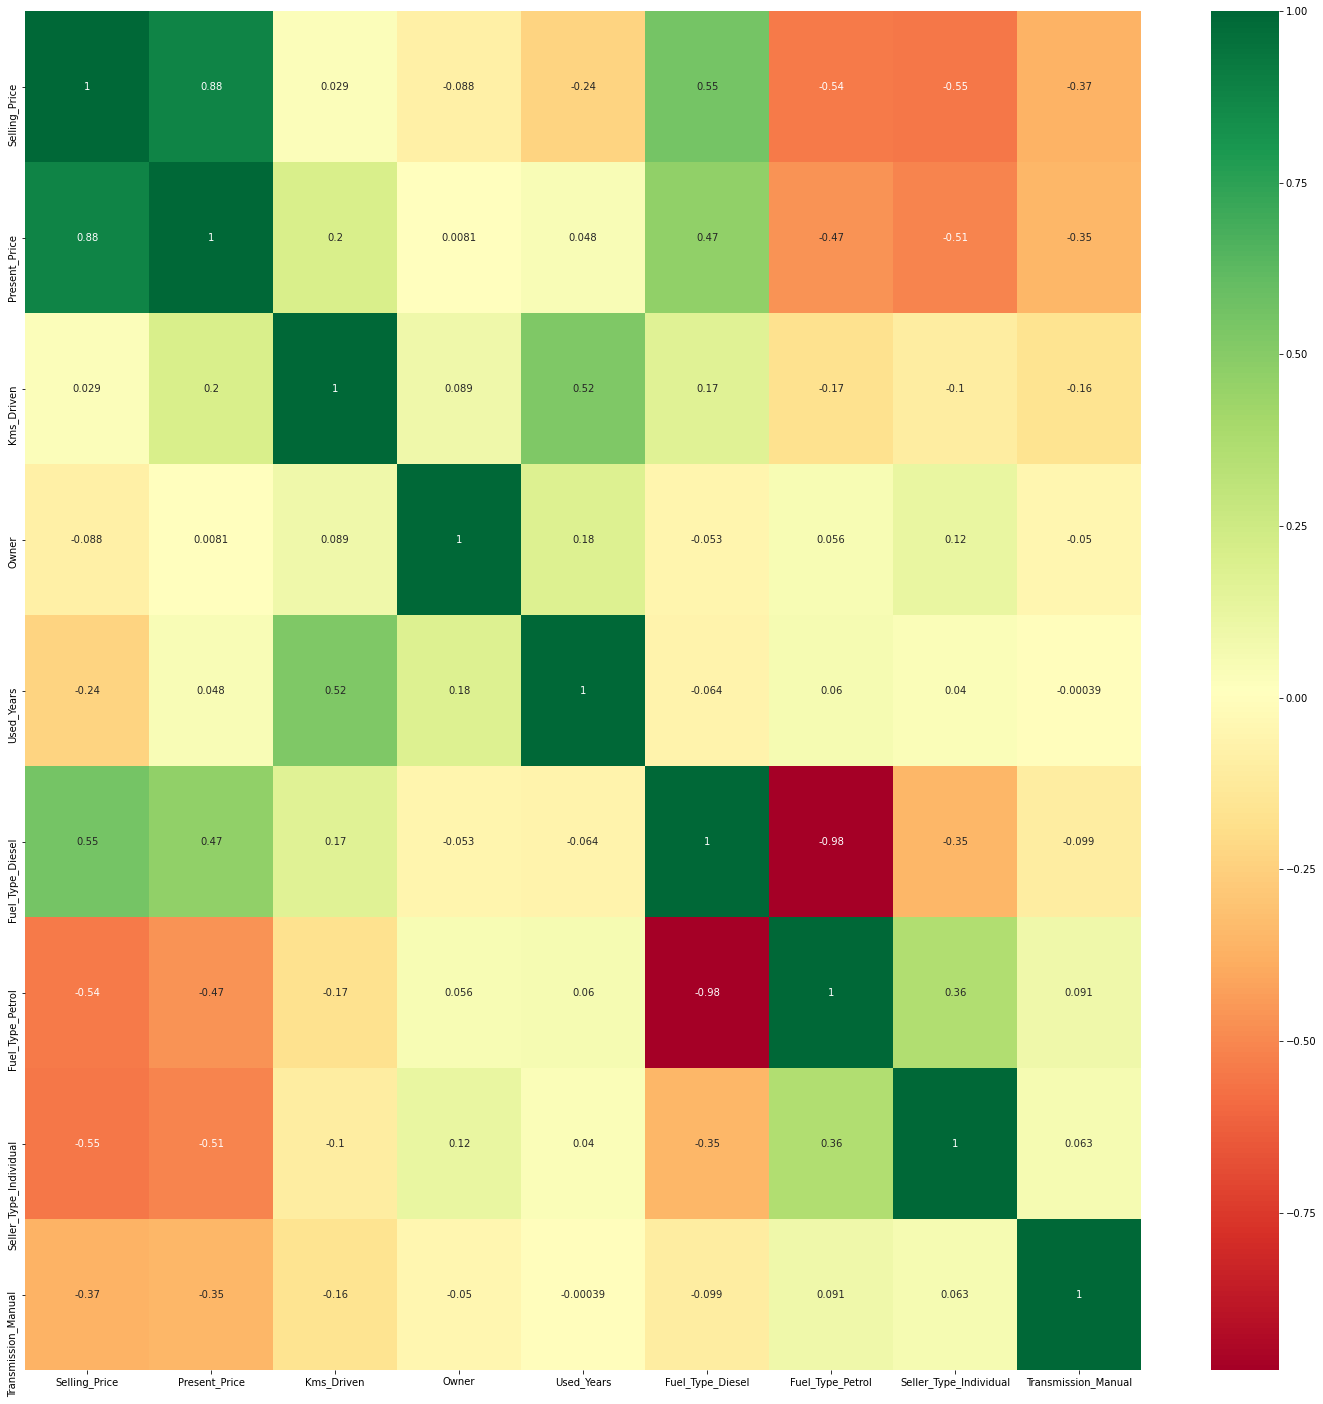

In [36]:
corrmat = df_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (25,25)) 
g = sns.heatmap(df_new[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [44]:
#Independent and dependent variables seperation
X = df_new.iloc[:,1:]
y = df_new.iloc[:,0]

In [45]:
X.head()

,Present_Price,Kms_Driven,Owner,Used_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [46]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [54]:
X.head()

,Present_Price,Kms_Driven,Owner,Used_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [50]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [53]:
model.feature_importances_

array([0.37687024, 0.0420218 , 0.00132758, 0.0713382 , 0.22382368,
       0.00836149, 0.13228302, 0.14397398])

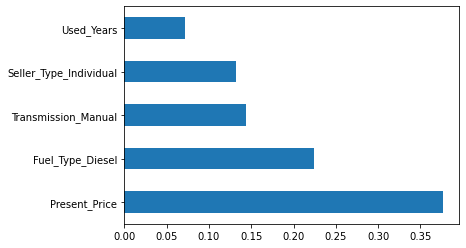

In [55]:
#Plotting graph for feature importance
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [56]:
#Scaling is not required as Random tree uses decision tress and decision trees not required scaling
#splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [60]:
y_train.head()

140    0.60
141    0.60
104    1.35
110    1.20
124    0.95
Name: Selling_Price, dtype: float64

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [64]:
#Hyperparameter Tuning
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200,num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [66]:
#Randomized search CV
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200,num = 12)]
#Number of features to consider in every split
max_features = ['auto','sqrt']
#Maximum number of levels in trees
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#minumum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [68]:
from sklearn.model_selection import RandomizedSearchCV
#Create the random grid
random_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [69]:
#Use the random grid to search for best hyperparameters
#First create base model to tune
rf=RandomForestRegressor()

In [70]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [72]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
predictions = rf_random.predict(X_test)

In [74]:
predictions

array([ 1.08732 ,  4.80636 ,  0.92733 ,  0.70168 ,  7.00984 ,  4.7603  ,
        7.85656 ,  5.15734 ,  8.52988 ,  0.54671 ,  0.63424 ,  4.81842 ,
       12.67579 ,  0.635285,  5.2032  ,  1.37109 ,  9.55268 ,  7.47357 ,
        6.59694 ,  3.14287 ,  2.66525 ,  3.46397 , 10.54415 ,  0.33881 ,
        4.2862  ,  7.18371 ,  5.37255 ,  0.56826 ,  0.76386 ,  5.83869 ,
        1.83751 ,  3.4846  ,  0.93281 ,  5.31726 ,  3.41261 ,  4.19158 ,
        0.56696 ,  5.46856 ,  3.27176 ,  0.38134 ,  4.45999 ,  7.28288 ,
        4.81374 ,  3.33122 ,  4.63778 ,  7.856515,  4.97815 ,  0.29996 ,
        7.02384 ,  1.28155 ,  4.97787 ,  0.82289 ,  5.947   ,  6.02197 ,
        6.54506 ,  0.49246 ,  0.55631 ,  8.62656 ,  3.23387 , 18.30992 ,
        6.31788 ])

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

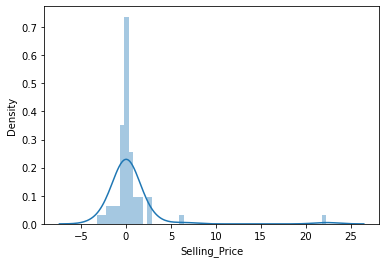

In [77]:
sns.distplot(y_test-predictions)

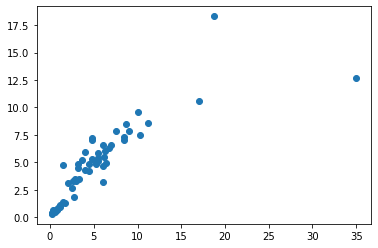

In [79]:
plt.scatter(y_test,predictions)

In [81]:
import pickle
#Open the file where you want to store the data
file = open(r'D:\Machine Learning\Project\UsedCarData\random_forest_regression_model.pkl','wb')
#dump information to that file
pickle.dump(rf_random,file)

In [ ]:
from flask import Flask, render_template, request
import jsonify
import requests
import pickle
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
app = Flask(__name__)
model = pickle.load(open('random_forest_regression_model.pkl', 'rb'))
@app.route('/',methods=['GET'])
def Home():
    return render_template('index.html')


standard_to = StandardScaler()
@app.route("/predict", methods=['POST'])
def predict():
    Fuel_Type_Diesel=0
    if request.method == 'POST':
        Year = int(request.form['Year'])
        Present_Price=float(request.form['Present_Price'])
        Kms_Driven=int(request.form['Kms_Driven'])
        Kms_Driven2=np.log(Kms_Driven)
        Owner=int(request.form['Owner'])
        Fuel_Type_Petrol=request.form['Fuel_Type_Petrol']
        if(Fuel_Type_Petrol=='Petrol'):
                Fuel_Type_Petrol=1
                Fuel_Type_Diesel=0
        else:
            Fuel_Type_Petrol=0
            Fuel_Type_Diesel=1
        Year=2020-Year
        Seller_Type_Individual=request.form['Seller_Type_Individual']
        if(Seller_Type_Individual=='Individual'):
            Seller_Type_Individual=1
        elif(Seller_Type_Individual=='CNG'):
            Seller_Type_Individual=0
        else:
            Seller_Type_Individual=0
        Transmission_Mannual=request.form['Transmission_Mannual']
        if(Transmission_Mannual=='Mannual'):
            Transmission_Mannual=1
        else:
            Transmission_Mannual=0
        prediction=model.predict([[Present_Price,Kms_Driven2,Owner,Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Mannual]])
        output=round(prediction[0],2)
        if output<0:
            return render_template('index.html',prediction_texts="Sorry you cannot sell this car")
        else:
            return render_template('index.html',prediction_text="You Can Sell The Car at {}".format(output))
    else:
        return render_template('index.html')

if __name__=="__main__":
    app.run(debug=True)